# Reading the Data


In [7]:
import pandas as pd
df=pd.read_csv(r'C:\Users\prabhat\Downloads\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Analysis & Data Visualization

In [8]:
df.shape

(200, 5)

There are **200 rows & 5 columns**. This means **200 data points** in the data and **5 features**. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


All the features are integer except the feature **'Gender'**. All the data are **non-null**. Which is good for us.

Now let's see what kind of trends are there in the Dataset. We will first start with looking at how many males and females are there in the dataset

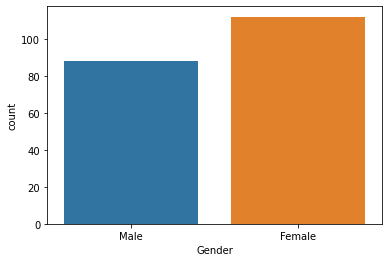

In [10]:
import seaborn as sns
sns.countplot('Gender',data=df)

From here we can see the number of females is **more than** the number of males. (As Expected!!!). Now let's see how many people belong to different ages.

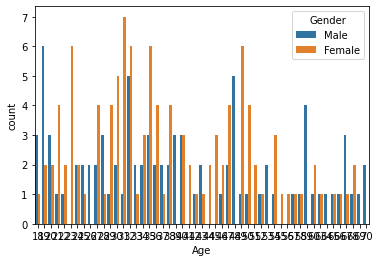

In [11]:
sns.countplot('Age',hue='Gender',data=df)

Again, the labels are not clear. So let's zoom in a bit.





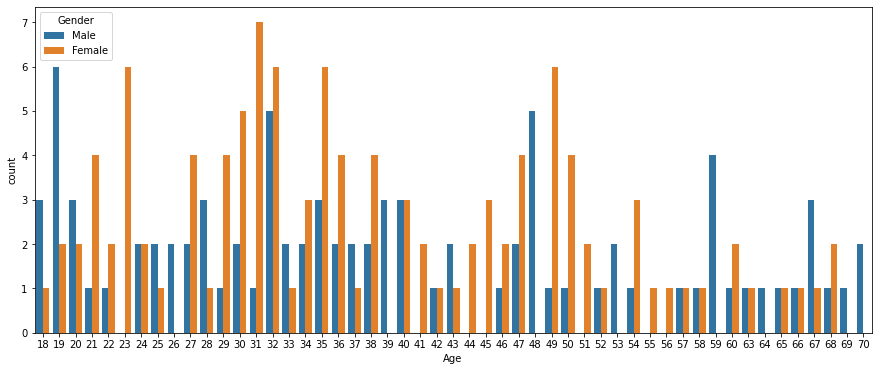

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.countplot('Age',hue='Gender',data=df)


*   There are two age ranges who comes the most to the mall. 1st age range is 27-38 and the second age range is 47-50. 


*   For the age group 18,19,20 the number of males is more than the number of females.



Let's have a similar observation for Annual Income

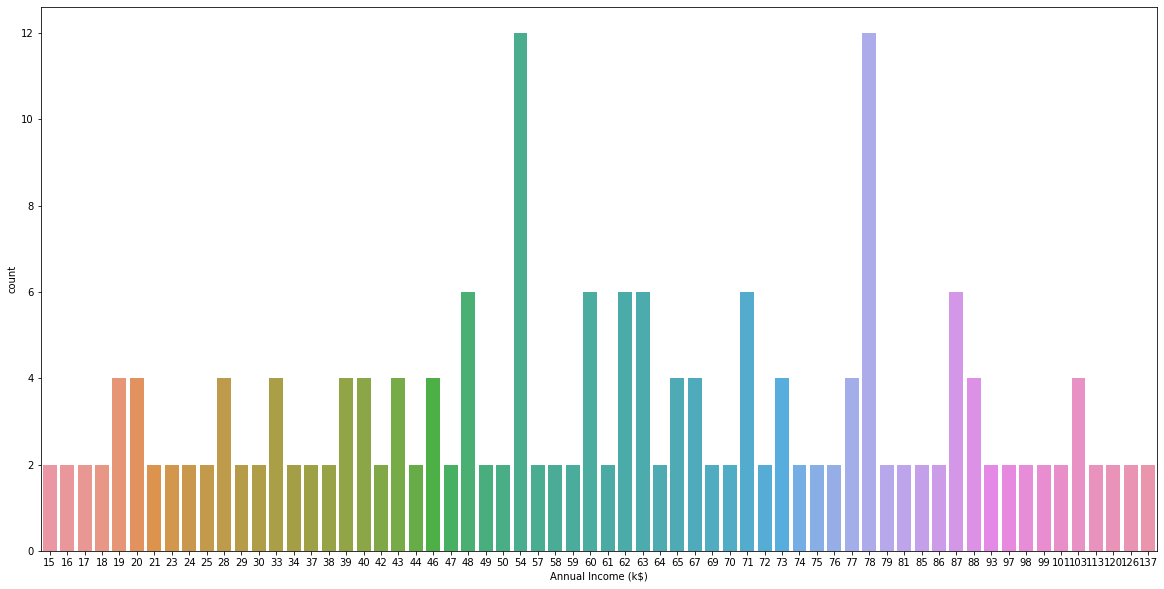

In [13]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot('Annual Income (k$)',data=df)

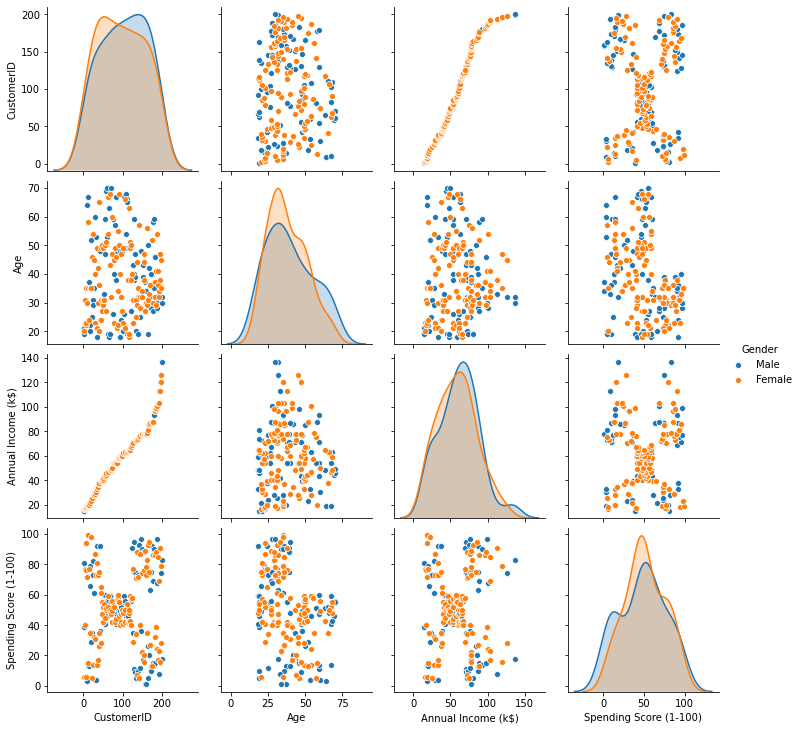

In [14]:
import seaborn as sns
sns.pairplot(df, hue='Gender')


*  Here we see that the feature 'Gender' is not much of a differentiating factor here. So we can easily get rid of it by **dropping** it.

*  Secondly, the feature CustomerID is also not going to take me anywhere as that is somewhere abrupt. So we will **drop** that also.





In [15]:
df=df.drop(['Gender','CustomerID'],axis=1)

In [16]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


# Building the Model

In [ ]:
from sklearn.cluster import KMeans
clusters=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
clusters


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

sns.lineplot(x=list(range(1, 11)), y=clusters)


Since we can see two elbows here at 3 and 5 so the best clusters should be one of them. So we will make 3 clusters and 5 clusters and check which one is giving good insight of the model.

Making 3 clusters

In [ ]:
km3 = KMeans(n_clusters=3).fit(df)

df['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.show()


Making 5 clusters

In [ ]:
km5 = KMeans(n_clusters=5).fit(df)

df['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], palette=sns.color_palette('hls', 5))
plt.show()
